In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_pickle("F:/Thinkful/Datasets/liquor_dataframe.pkl")

In [3]:
#df = pd.read_csv("F:/Thinkful/Files/Iowa_Liquor_Sales.csv",low_memory = False)

In [4]:
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08


In [5]:
df.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')

In [6]:
#Choose the columns that we need
df2 = df[['Date','Store Name',
       'City', 'Zip Code','County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number','Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)']].copy()

In [7]:
df2.head()

,Date,Store Name,City,Zip Code,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
0,11/20/2015,Keokuk Spirits,KEOKUK,52632,Lee,NaN,NaN,255.0,Wilson Daniels Ltd.,297,6,750,$18.09,$27.14,6,$162.84,4.50
1,11/21/2015,Ding's Honk And Holler,CLARINDA,51632,Page,NaN,NaN,255.0,Wilson Daniels Ltd.,297,6,750,$18.09,$27.14,12,$325.68,9.00
2,11/16/2015,Quicker Liquor Store,FORT MADISON,52627,Lee,NaN,NaN,130.0,Disaronno International LLC,249,20,150,$6.40,$9.60,2,$19.20,0.30
3,11/04/2015,Hy-Vee Food Store #2 / Iowa City,IOWA CITY,52240,Johnson,NaN,NaN,65.0,Jim Beam Brands,237,3,1750,$35.55,$53.34,3,$160.02,5.25
4,11/17/2015,Twin Town Liquor,TOLEDO,52342,Tama,NaN,NaN,130.0,Disaronno International LLC,249,20,150,$6.40,$9.60,2,$19.20,0.30


In [8]:
#Start cleanning up the table
df2["Cost_per_bottle"] = df2['State Bottle Cost'].str.replace('$','')
df2["Retail_price"] = df2['State Bottle Retail'].str.replace('$','')
df2["Total_Sales"] = df2['Sale (Dollars)'].str.replace('$','')

In [9]:
df2["Cost_per_bottle"] = pd.to_numeric(df2["Cost_per_bottle"])
df2["Retail_price"] = pd.to_numeric(df2["Retail_price"])
df2["Total_Sales"] = pd.to_numeric(df2["Total_Sales"])

In [10]:
df2.rename(columns={'Vendor Name':'Vendor_Name'}, inplace=True)

In [11]:
df2['Vendor_Name'] = df2.Vendor_Name.apply(str)

In [12]:
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("3 BADGE MIXOLOGY","3 Badge Mixology")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("A Hardy / U.S.A., Ltd.","A HARDY USA LTD")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("Anchor Distilling (PREISS IMPORTS)","Anchor Distilling")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("Brown-Forman Corporation","Brown Forman Corp.")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("Campari(skyy)","Campari")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("Charles Jacquin/Independent Spirits","Charles Jacquin Et Cie")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("Charles Jacquin Et. Cie., Inc.","Charles Jacquin Et Cie")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("DEHNER DISTILLERY","Dehner Distillery")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("DIAGEO AMERICAS","Diageo Americas")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("DISARONNO INTERNATIONAL","Disaronno International LLC")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("DUGGANS DISTILLERS","Duggan's Distillers Products Corp")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("Domaine Select Wine Estates","Domaine Select")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("Dreyfus, Ashby Co.","Dreyfus Ashby")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("E and J Gallo Winery","E & J Gallo Winery")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("E AND J GALLO WINERY","E & J Gallo Winery")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("FOUR ROSES DISTILLERY","Four Roses Distillery")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("GUNSANDMORE INFO LLC","Gunsandmore.info")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("HAAS BROTHERS","Haas Brothers")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("HIGH WEST DISTILLERY LLC","High West Distillery")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("High West Distillery, LLC","High West Distillery")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("HILLROCK ESTATE DISTILLERY","Hillrock Estate Distillery LLC")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("Hood River Distillers, Inc.","Hood River Distillers")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("IMPERIAL BRANDS INC","Imperial Brands, Inc.")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("IMPEX BEVERAGE INC","Impex Beverages Inc")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("JINRO AMERICA INC","Jinro America, Inc")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("KINDRED SPIRIT N AMERICA","Kindred Spirits Of North America")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("KOLOA RUM COMPANY","Koloa Rum Company")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("KOVAL DISTILLERY","Koval Distillery")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("LEVECKE CORP","Levecke Corp")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("Levecke Corp.","Levecke Corp")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("Levecke Corporation","Levecke Corp")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("Levecke Corporation JJB","Levecke Corp")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("Laird And Company","Laird & Company")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("M.S. Walker, Inc.","MS WALKER INC")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("MARSALLE COMPANY","Marsalle Company")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("Marsalle Company/Stoller Warehouse","Marsalle Company")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("Mhw LTD","MHW Ltd")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("MINHAS MICRO DISTILLERY","Minhas Micro Distillery")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("MISSISSIPPI RIVER DISTIL","Mississippi River Distilling Co.")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("MODERN SPIRIT LLC","Modern Spirits")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("MOET HENNESSY USA","Moet Hennessy USA, Inc.")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("MS WALKER INC","M.S. Walker, Inc.")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("NORTH SHORE DISTILLERY","North Shore Distillery, LLC.")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("Niche Import Co.","Niche Import Co")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("OLE SMOKY DISTILLERY LLC","Ole Smoky Distillery, LLC")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("PACIFIC EDGE WINE & SPIRITS","Pacific Edge Wine & Spirits")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("Pacific Edge Wine and Spirits","Pacific Edge Wine & Spirits")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("PALM BAY INTERNATIONAL","Palm Bay Imports, Inc.")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("PARADISE DISTILLING COMPANY","Paradise Distilling Company")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("PERNOD RICARD USA","Pernod Ricard USA/Austin Nichols")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("PIEDMONT DISTILLERS INC","Piedmont Distillers")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("PROST BEVERAGE COMPANY","Prost Beverage Company")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("PROXIMO","Proximo")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("Paterno Imports, Ltd.","Paterno Imports LTD")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("Phillips Beverage Company","Phillips Beverage")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("Prestige Wine and Spirits Group","Prestige Wine & Spirits Group")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("QUADRO GROUP LLC","Quadro Group LLC")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("REMY COINTREAU USA         .","Remy Cointreau USA")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("R�my Cointreau USA","Remy Cointreau USA")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("REMY COINTREAU USA INC","Remy Cointreau USA")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("RUSSIAN STANDARD VODKA","Russian Standard Vodka, USA")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("SAZERAC COMPANY  INC","Sazerac North America")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("SAZERAC NORTH AMERICA","Sazerac North America")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("Sazerac Co., Inc.","Sazerac North America")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("SERRALLES USA","Serralles USA")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("SPIRIT OF HARTFORD","Spirit of Hartford")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("ST GEORGE SPIRITS INC","St. George Spirit, Inc")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("STE MICHELLE WINE ESTATES","Ste. Michelle Wine Estates")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("STEPHEN AUGUSTUS IMPORTS","Stephen Augustus Imports")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("STOLI GROUP","Stoli Group")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("SURVILLE ENTERPRISES CORP","Surville Enterprises Corp")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("SWISS CELLARS","Swiss Cellars")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("Shaw Ross International Importers LL","Shaw-Ross International")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("Sidney Frank Importing Company, Inc.","Sidney Frank Importing Co.")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("Sovereign Brands, LLC","Sovereign Brands")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("Spirit Imports, Inc.","Spirit Imports Inc")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("TY KU, LLC","TY KU LLC")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("Topa Spirits, LLC","Topa Spirits")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("W. J. Deutsch And Sons, Ltd.","W J Deutsch & Sons LTD")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("WERNER DISTILLING","Werner Distilling, LLC")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("WESTERN SPIRITS BEVERAGE","Western Spirits Beverage Co. LLC")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("William Grant and Sons, Inc.","William Grant & Sons Inc")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("WILLIAM GRANT AND SONS, INC.","William Grant & Sons Inc")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("WILSON DANIELS LTD","Wilson Daniels Ltd.")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("WINDY HILL SPIRITS","Windy Hill Spirits")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("WhistlePig LLC","WhistlePig")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("Winebow, Inc.","Winebow Inc")
df2["Vendor_Name"] = df2["Vendor_Name"].str.replace("YAHARA BAY DISTILLERS INC","Yahara Bay Distillers, Inc")

In [13]:
df2.head()

,Date,Store Name,City,Zip Code,County,Category,Category Name,Vendor Number,Vendor_Name,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Cost_per_bottle,Retail_price,Total_Sales
0,11/20/2015,Keokuk Spirits,KEOKUK,52632,Lee,NaN,NaN,255.0,Wilson Daniels Ltd.,297,6,750,$18.09,$27.14,6,$162.84,4.50,18.09,27.14,162.84
1,11/21/2015,Ding's Honk And Holler,CLARINDA,51632,Page,NaN,NaN,255.0,Wilson Daniels Ltd.,297,6,750,$18.09,$27.14,12,$325.68,9.00,18.09,27.14,325.68
2,11/16/2015,Quicker Liquor Store,FORT MADISON,52627,Lee,NaN,NaN,130.0,Disaronno International LLC,249,20,150,$6.40,$9.60,2,$19.20,0.30,6.40,9.60,19.20
3,11/04/2015,Hy-Vee Food Store #2 / Iowa City,IOWA CITY,52240,Johnson,NaN,NaN,65.0,Jim Beam Brands,237,3,1750,$35.55,$53.34,3,$160.02,5.25,35.55,53.34,160.02
4,11/17/2015,Twin Town Liquor,TOLEDO,52342,Tama,NaN,NaN,130.0,Disaronno International LLC,249,20,150,$6.40,$9.60,2,$19.20,0.30,6.40,9.60,19.20


In [14]:
df2.columns

Index(['Date', 'Store Name', 'City', 'Zip Code', 'County', 'Category',
       'Category Name', 'Vendor Number', 'Vendor_Name', 'Item Number', 'Pack',
       'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Sale (Dollars)', 'Volume Sold (Liters)',
       'Cost_per_bottle', 'Retail_price', 'Total_Sales'],
      dtype='object')

In [15]:
#Try to find anything interesting by looking at the overall statistical fact
df2.describe(include = [np.number])

,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Cost_per_bottle,Retail_price,Total_Sales
count,1.258306e+07,1.259107e+07,1.259108e+07,1.259108e+07,1.259108e+07,1.259108e+07,1.259108e+07,1.259107e+07,1.259107e+07,1.259107e+07
mean,1.044710e+06,2.574911e+02,4.603682e+04,1.222533e+01,9.289402e+02,8.140392e+00,7.489119e+00,9.659111e+00,1.451134e+01,1.165918e+02
std,5.435094e+04,1.416175e+02,5.301684e+04,7.458673e+00,7.340448e+02,2.217891e+01,2.679149e+01,1.174101e+01,1.761109e+01,3.843290e+02
min,1.012200e+05,1.000000e+01,1.010000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.012210e+06,1.150000e+02,2.705600e+04,6.000000e+00,7.500000e+02,2.000000e+00,1.500000e+00,5.500000e+00,8.250000e+00,2.544000e+01
50%,1.031200e+06,2.600000e+02,3.817700e+04,1.200000e+01,7.500000e+02,4.000000e+00,3.000000e+00,7.960000e+00,1.199000e+01,6.714000e+01
75%,1.062310e+06,3.800000e+02,6.375500e+04,1.200000e+01,1.000000e+03,1.200000e+01,9.000000e+00,1.175000e+01,1.763000e+01,1.327200e+02
max,1.901200e+06,9.870000e+02,9.992750e+05,6.000000e+02,3.780000e+05,1.500000e+04,1.500000e+04,7.680000e+03,1.152000e+04,2.541000e+05


### By looking at the min value in the table above, some store may give out their product for free. Let's dig into it a little bit more.

In [16]:
freeVender = df2[(df2['Cost_per_bottle'] == 0) | (df2['Retail_price'] == 0) | (df2['Total_Sales'] == 0)]

In [17]:
blacksheep = freeVender.groupby(['Vendor_Name']).sum()['Bottles Sold']

In [18]:
blacksheep = pd.DataFrame(blacksheep)
#blacksheep
blacksheep.sort_values(by = ['Bottles Sold'],ascending=False)

,Bottles Sold
Vendor_Name,
Luxco-St Louis,18076
Diageo Americas,427
Luxco-Cleveland,326
LUXCO INC,281
Jim Beam Brands,263
Sazerac North America,206
Proximo,205
CONSTELLATION BRANDS INC,143
Brown Forman Corp.,126


In [19]:
bestselling = df2.groupby(['Vendor_Name']).sum()['Bottles Sold']
bestselling = pd.DataFrame(bestselling)
bestselling.sort_values(by = 'Bottles Sold', ascending = False)
#exclude bottles sold for free

,Bottles Sold
Vendor_Name,
Diageo Americas,17109235
Sazerac North America,11623437
Luxco-St Louis,11052070
Jim Beam Brands,8097286
"Constellation Wine Company, Inc.",7970983
Pernod Ricard USA/Austin Nichols,5871337
Laird & Company,4448169
Brown Forman Corp.,4361848
Phillips Beverage,4012095


### With the two tables above, we can tell that they give out free product not because they want to but because they don't care (For promotion or other reasons) because their profit can easily cover it. The comparison I did above is just for personal interest, may not useful to lead to a practical conclusion.

In [20]:
np.linspace(0,30000,50)

array([    0.        ,   612.24489796,  1224.48979592,  1836.73469388,
        2448.97959184,  3061.2244898 ,  3673.46938776,  4285.71428571,
        4897.95918367,  5510.20408163,  6122.44897959,  6734.69387755,
        7346.93877551,  7959.18367347,  8571.42857143,  9183.67346939,
        9795.91836735, 10408.16326531, 11020.40816327, 11632.65306122,
       12244.89795918, 12857.14285714, 13469.3877551 , 14081.63265306,
       14693.87755102, 15306.12244898, 15918.36734694, 16530.6122449 ,
       17142.85714286, 17755.10204082, 18367.34693878, 18979.59183673,
       19591.83673469, 20204.08163265, 20816.32653061, 21428.57142857,
       22040.81632653, 22653.06122449, 23265.30612245, 23877.55102041,
       24489.79591837, 25102.04081633, 25714.28571429, 26326.53061224,
       26938.7755102 , 27551.02040816, 28163.26530612, 28775.51020408,
       29387.75510204, 30000.        ])

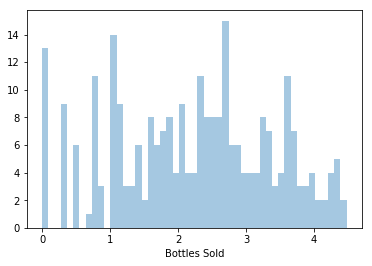

In [21]:
axe = sns.distplot(np.log10(bestselling['Bottles Sold']),bins = np.linspace(0,np.log10(30000),50),kde = False)
#axe.set_yscale('log')
#axe.axis([0,30000,np.log10(1),np.log10(300)])

### I need the profit of each sale for the further analysis.

In [22]:
df2['Total_Cost'] = df2['Cost_per_bottle']*df2['Bottles Sold']

In [23]:
df2['Profit'] = df2['Total_Sales'] - df2['Total_Cost']

In [24]:
df2.head()

,Date,Store Name,City,Zip Code,County,Category,Category Name,Vendor Number,Vendor_Name,Item Number,...,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Cost_per_bottle,Retail_price,Total_Sales,Total_Cost,Profit
0,11/20/2015,Keokuk Spirits,KEOKUK,52632,Lee,NaN,NaN,255.0,Wilson Daniels Ltd.,297,...,$18.09,$27.14,6,$162.84,4.50,18.09,27.14,162.84,108.54,54.30
1,11/21/2015,Ding's Honk And Holler,CLARINDA,51632,Page,NaN,NaN,255.0,Wilson Daniels Ltd.,297,...,$18.09,$27.14,12,$325.68,9.00,18.09,27.14,325.68,217.08,108.60
2,11/16/2015,Quicker Liquor Store,FORT MADISON,52627,Lee,NaN,NaN,130.0,Disaronno International LLC,249,...,$6.40,$9.60,2,$19.20,0.30,6.40,9.60,19.20,12.80,6.40
3,11/04/2015,Hy-Vee Food Store #2 / Iowa City,IOWA CITY,52240,Johnson,NaN,NaN,65.0,Jim Beam Brands,237,...,$35.55,$53.34,3,$160.02,5.25,35.55,53.34,160.02,106.65,53.37
4,11/17/2015,Twin Town Liquor,TOLEDO,52342,Tama,NaN,NaN,130.0,Disaronno International LLC,249,...,$6.40,$9.60,2,$19.20,0.30,6.40,9.60,19.20,12.80,6.40


In [25]:
#Profit by each company
profitValue = df2.groupby(['Vendor_Name']).sum()['Profit']
profitValue = pd.DataFrame(profitValue)
profitValue.sort_values(by = 'Profit',ascending = False)

,Profit
Vendor_Name,
Diageo Americas,1.245175e+08
Sazerac North America,5.386298e+07
Jim Beam Brands,4.633720e+07
Pernod Ricard USA/Austin Nichols,4.210477e+07
Brown Forman Corp.,3.432276e+07
Luxco-St Louis,2.910374e+07
"Constellation Wine Company, Inc.",2.640555e+07
"Bacardi U.S.A., Inc.",2.257945e+07
Proximo,1.945316e+07


In [26]:
profitValue.describe()

,Profit
count,3.120000e+02
mean,1.845923e+06
std,9.216307e+06
min,-8.497361e+04
25%,6.162325e+02
50%,4.504585e+03
75%,3.555821e+04
max,1.245175e+08


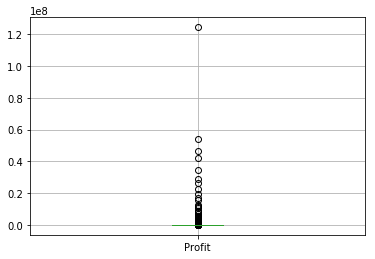

In [27]:
profitValue.boxplot(column = ['Profit'])

In [28]:
lowTiers = pd.DataFrame(profitValue[profitValue['Profit'] < 500000])

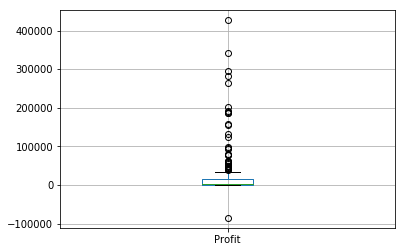

In [29]:
lowTiers.boxplot(column = ['Profit'])

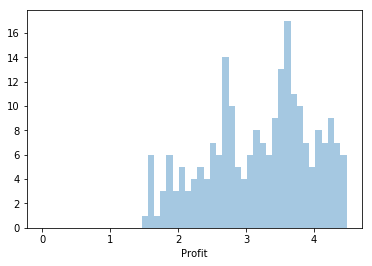

In [30]:
profit = sns.distplot(np.log10(profitValue['Profit']),bins = np.linspace(0,np.log10(30000),50),kde = False)

### Based on the above box plot, we can see that datas are pretty scattered because we don't have many companies in the table. So let's focus on each store.

In [31]:
profitLoc = df2.groupby(['Store Name']).sum()['Profit']
profitLoc = pd.DataFrame(profitLoc)
profitLoc.sort_values(by = 'Profit')

,Profit
Store Name,
Casey's General Store #3055 / Grundy Center,-8.636960e+03
Casey's General Store #3050 / Council Bluffs,-5.026360e+03
Casey's General Store #1706 / Winterset,-3.942680e+03
Casey's General Store # 3564/ Robins,-3.333360e+03
Kum & Go #129 / Johnston,-2.525280e+03
Casey's General Store #37 / Dakota City,-2.266370e+03
Mods Market,-1.799970e+03
Mt. Pleasant Fast Break,-1.572040e+03
Tobacco Hut & Liquor,-1.334080e+03


### Until now, we can see that Casey's General Store is the worst-hit merchant. Let's find out why and help them out.

In [32]:
Casey = df2[df2['Store Name'].str.contains("Casey's")]

In [33]:
Casey

,Date,Store Name,City,Zip Code,County,Category,Category Name,Vendor Number,Vendor_Name,Item Number,...,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Cost_per_bottle,Retail_price,Total_Sales,Total_Cost,Profit
137,04/10/2012,Casey's General Store #2762 / Cedar,CEDAR RAPIDS,52404,Linn,1032200.0,IMPORTED VODKA - MISC,370.0,Pernod Ricard USA/Austin Nichols,34061,...,$10.89,$16.33,4,$65.32,3.00,10.89,16.33,65.32,43.56,21.76
152,01/12/2015,Casey's General Store #2802 / Conrad,CONRAD,50621,Grundy,1031080.0,VODKA 80 PROOF,260.0,Diageo Americas,37991,...,$7.47,$11.21,1,$11.21,0.50,7.47,11.21,11.21,7.47,3.74
189,04/15/2013,Casey's General Store #1139 / Nora S,NORA SPRINGS,50458,Floyd,1031080.0,VODKA 80 PROOF,297.0,Laird & Company,35918,...,$7.20,$10.79,18,$194.22,31.50,7.20,10.79,194.22,129.60,64.62
196,08/13/2013,Casey's General Store #37 / Dakota C,DAKOTA CITY,50529,Humboldt,1062310.0,SPICED RUM,259.0,Heaven Hill Brands,43026,...,$5.77,$8.66,12,$103.92,9.00,5.77,8.66,103.92,69.24,34.68
246,11/19/2015,Casey's General Store #1617 / Jeffer,JEFFERSON,50129,Greene,1062310.0,SPICED RUM,260.0,Diageo Americas,43336,...,$9.00,$13.50,3,$40.50,2.25,9.00,13.50,40.50,27.00,13.50
284,01/14/2014,Casey's General Store #3034 / Esther,ESTHERVILLE,51334,Emmet,1062310.0,SPICED RUM,259.0,Heaven Hill Brands,43024,...,$2.74,$4.11,12,$49.32,4.50,2.74,4.11,49.32,32.88,16.44
330,10/01/2013,Casey's General Store #2763 / Cedar,CEDAR RAPIDS,52405,Linn,1051010.0,AMERICAN GRAPE BRANDIES,259.0,Heaven Hill Brands,52316,...,$5.41,$8.37,6,$50.22,4.50,5.41,8.37,50.22,32.46,17.76
454,02/16/2015,Casey's General Store #3035 / Atlant,ATLANTIC,50022,Cass,1081200.0,CREAM LIQUEURS,260.0,Diageo Americas,68034,...,$7.00,$10.50,3,$31.50,1.12,7.00,10.50,31.50,21.00,10.50
482,03/26/2012,Casey's General Store #40 / Scranton,SCRANTON,51462,Greene,1032080.0,IMPORTED VODKA,370.0,Pernod Ricard USA/Austin Nichols,34006,...,$10.89,$16.33,6,$97.98,4.50,10.89,16.33,97.98,65.34,32.64
534,12/06/2012,Casey's General Store #2824 / WDM,WEST DES MOINES,50266,Polk,1031080.0,VODKA 80 PROOF,297.0,Laird & Company,35918,...,$7.20,$10.79,6,$64.74,10.50,7.20,10.79,64.74,43.20,21.54


In [34]:
#Let's see their profit condition
CaseyProfit = Casey.groupby(['Store Name']).sum()['Profit']
CaseyProfit = pd.DataFrame(CaseyProfit)
CaseyProfit.sort_values(by = 'Profit')

,Profit
Store Name,
Casey's General Store #3055 / Grundy Center,-8636.96
Casey's General Store #3050 / Council Bluffs,-5026.36
Casey's General Store #1706 / Winterset,-3942.68
Casey's General Store # 3564/ Robins,-3333.36
Casey's General Store #37 / Dakota City,-2266.37
Casey's General Store # 2560/ Ames,-1090.81
Casey's General Store # 1441/ Marshalltown,-783.56
Casey's General Store # 1876/Manly,-732.02
Casey's General Store #1550,-656.84


In [35]:
CaseyProfit.describe()

,Profit
count,313.000000
mean,27722.065272
std,30411.629126
min,-8636.960000
25%,8639.260000
50%,22419.390000
75%,39224.080000
max,361605.840000


### What are the top3 popular products in Casey's?

In [36]:
ItemProfit = Casey.groupby(['Item Number','Category Name']).sum()['Profit']
ItemProfit = pd.DataFrame(ItemProfit)
ItemProfit.sort_values(by = 'Profit',ascending = False)

,,Profit
Item Number,Category Name,
11788,CANADIAN WHISKIES,402413.59
11776,CANADIAN WHISKIES,235846.54
35918,VODKA 80 PROOF,220534.26
11788,Canadian Whiskies,214494.82
43336,SPICED RUM,180903.12
11776,Canadian Whiskies,173348.09
43338,SPICED RUM,157575.86
26826,TENNESSEE WHISKIES,154400.93
11296,CANADIAN WHISKIES,151942.22


### So now we know the top 3 popular and profitable products. I think for those stores that don't have these products or didn't make much money from those three products, a wave of promotion should make the riffle. Before that, let's see if every store has these products or made any sale on it. 

In [37]:
Casey['InOrNot'] = np.where((Casey['Item Number'] == 11788) | (Casey['Item Number'] == 11776) | (Casey['Item Number'] == 35918) , 'Yes' , 'No')

In [38]:
pd.options.mode.chained_assignment = None

In [39]:
Casey

,Date,Store Name,City,Zip Code,County,Category,Category Name,Vendor Number,Vendor_Name,Item Number,...,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Cost_per_bottle,Retail_price,Total_Sales,Total_Cost,Profit,InOrNot
137,04/10/2012,Casey's General Store #2762 / Cedar,CEDAR RAPIDS,52404,Linn,1032200.0,IMPORTED VODKA - MISC,370.0,Pernod Ricard USA/Austin Nichols,34061,...,$16.33,4,$65.32,3.00,10.89,16.33,65.32,43.56,21.76,No
152,01/12/2015,Casey's General Store #2802 / Conrad,CONRAD,50621,Grundy,1031080.0,VODKA 80 PROOF,260.0,Diageo Americas,37991,...,$11.21,1,$11.21,0.50,7.47,11.21,11.21,7.47,3.74,No
189,04/15/2013,Casey's General Store #1139 / Nora S,NORA SPRINGS,50458,Floyd,1031080.0,VODKA 80 PROOF,297.0,Laird & Company,35918,...,$10.79,18,$194.22,31.50,7.20,10.79,194.22,129.60,64.62,Yes
196,08/13/2013,Casey's General Store #37 / Dakota C,DAKOTA CITY,50529,Humboldt,1062310.0,SPICED RUM,259.0,Heaven Hill Brands,43026,...,$8.66,12,$103.92,9.00,5.77,8.66,103.92,69.24,34.68,No
246,11/19/2015,Casey's General Store #1617 / Jeffer,JEFFERSON,50129,Greene,1062310.0,SPICED RUM,260.0,Diageo Americas,43336,...,$13.50,3,$40.50,2.25,9.00,13.50,40.50,27.00,13.50,No
284,01/14/2014,Casey's General Store #3034 / Esther,ESTHERVILLE,51334,Emmet,1062310.0,SPICED RUM,259.0,Heaven Hill Brands,43024,...,$4.11,12,$49.32,4.50,2.74,4.11,49.32,32.88,16.44,No
330,10/01/2013,Casey's General Store #2763 / Cedar,CEDAR RAPIDS,52405,Linn,1051010.0,AMERICAN GRAPE BRANDIES,259.0,Heaven Hill Brands,52316,...,$8.37,6,$50.22,4.50,5.41,8.37,50.22,32.46,17.76,No
454,02/16/2015,Casey's General Store #3035 / Atlant,ATLANTIC,50022,Cass,1081200.0,CREAM LIQUEURS,260.0,Diageo Americas,68034,...,$10.50,3,$31.50,1.12,7.00,10.50,31.50,21.00,10.50,No
482,03/26/2012,Casey's General Store #40 / Scranton,SCRANTON,51462,Greene,1032080.0,IMPORTED VODKA,370.0,Pernod Ricard USA/Austin Nichols,34006,...,$16.33,6,$97.98,4.50,10.89,16.33,97.98,65.34,32.64,No
534,12/06/2012,Casey's General Store #2824 / WDM,WEST DES MOINES,50266,Polk,1031080.0,VODKA 80 PROOF,297.0,Laird & Company,35918,...,$10.79,6,$64.74,10.50,7.20,10.79,64.74,43.20,21.54,Yes


In [40]:
#Select all non-top3 sales
NoPopItem = Casey[Casey['InOrNot'] == 'No']
NoPopItem

,Date,Store Name,City,Zip Code,County,Category,Category Name,Vendor Number,Vendor_Name,Item Number,...,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Cost_per_bottle,Retail_price,Total_Sales,Total_Cost,Profit,InOrNot
137,04/10/2012,Casey's General Store #2762 / Cedar,CEDAR RAPIDS,52404,Linn,1032200.0,IMPORTED VODKA - MISC,370.0,Pernod Ricard USA/Austin Nichols,34061,...,$16.33,4,$65.32,3.00,10.89,16.33,65.32,43.56,21.76,No
152,01/12/2015,Casey's General Store #2802 / Conrad,CONRAD,50621,Grundy,1031080.0,VODKA 80 PROOF,260.0,Diageo Americas,37991,...,$11.21,1,$11.21,0.50,7.47,11.21,11.21,7.47,3.74,No
196,08/13/2013,Casey's General Store #37 / Dakota C,DAKOTA CITY,50529,Humboldt,1062310.0,SPICED RUM,259.0,Heaven Hill Brands,43026,...,$8.66,12,$103.92,9.00,5.77,8.66,103.92,69.24,34.68,No
246,11/19/2015,Casey's General Store #1617 / Jeffer,JEFFERSON,50129,Greene,1062310.0,SPICED RUM,260.0,Diageo Americas,43336,...,$13.50,3,$40.50,2.25,9.00,13.50,40.50,27.00,13.50,No
284,01/14/2014,Casey's General Store #3034 / Esther,ESTHERVILLE,51334,Emmet,1062310.0,SPICED RUM,259.0,Heaven Hill Brands,43024,...,$4.11,12,$49.32,4.50,2.74,4.11,49.32,32.88,16.44,No
330,10/01/2013,Casey's General Store #2763 / Cedar,CEDAR RAPIDS,52405,Linn,1051010.0,AMERICAN GRAPE BRANDIES,259.0,Heaven Hill Brands,52316,...,$8.37,6,$50.22,4.50,5.41,8.37,50.22,32.46,17.76,No
454,02/16/2015,Casey's General Store #3035 / Atlant,ATLANTIC,50022,Cass,1081200.0,CREAM LIQUEURS,260.0,Diageo Americas,68034,...,$10.50,3,$31.50,1.12,7.00,10.50,31.50,21.00,10.50,No
482,03/26/2012,Casey's General Store #40 / Scranton,SCRANTON,51462,Greene,1032080.0,IMPORTED VODKA,370.0,Pernod Ricard USA/Austin Nichols,34006,...,$16.33,6,$97.98,4.50,10.89,16.33,97.98,65.34,32.64,No
558,11/18/2015,Casey's General Store #3434 / Denv,DENVER,50622,Bremer,1062310.0,SPICED RUM,260.0,Diageo Americas,43334,...,$7.50,24,$180.00,9.00,5.00,7.50,180.00,120.00,60.00,No
625,09/11/2014,Casey's General Store #1061 / Prince,PRINCETON,52768,Scott,1081700.0,DISTILLED SPIRITS SPECIALTY,384.0,Piedmont Distillers,76036,...,$16.50,6,$99.00,4.50,11.00,16.50,99.00,66.00,33.00,No


In [41]:
#let's see how much money they make without those top3 products.
confirmStore= NoPopItem.groupby(['Store Name']).sum()['Profit']
confirmStore = pd.DataFrame(confirmStore)
confirmStore.sort_values(by = 'Profit')

,Profit
Store Name,
Casey's General Store #3055 / Grundy Center,-11074.41
Casey's General Store #3050 / Council Bluffs,-6206.88
Casey's General Store # 2560/ Ames,-5352.88
Casey's General Store #1706 / Winterset,-4417.16
Casey's General Store #37 / Dakota City,-3963.19
Casey's General Store #2531 / Eldridge,-3536.50
Casey's General Store # 3564/ Robins,-3217.60
Casey's General Store #2237 / Prairie City,-2903.27
Casey's General Store # 1876/Manly,-2000.72


### It feels like the number under the profit column doesn' t change that much. In order to confirm this, let's compare the table above with 'CaseyProfit' table, the one that reflects the general profit condition of each Casey store before we took out the top3. I will re-order each table alphabetically so that each row will match up.

In [42]:
confirmStoreTemp = confirmStore.sort_index()
CaseyProfitTemp = CaseyProfit.sort_index()

In [43]:
confirmStoreTemp['Store_Name2'] = CaseyProfitTemp.index

In [44]:
confirmStoreTemp['Profit2'] = CaseyProfitTemp['Profit']

In [45]:
#Merged two tables into one
confirmStoreTemp

,Profit,Store_Name2,Profit2
Store Name,,,
Casey's General Store # 1029/ Tama,7054.86,Casey's General Store # 1029/ Tama,7745.26
Casey's General Store # 1331/ Sac Ci,2100.85,Casey's General Store # 1331/ Sac Ci,2365.93
Casey's General Store # 1331/ Sac City,6087.30,Casey's General Store # 1331/ Sac City,6375.10
Casey's General Store # 1441/ Marshalltown,-1076.37,Casey's General Store # 1441/ Marshalltown,-783.56
Casey's General Store # 1536/ George,3835.40,Casey's General Store # 1536/ George,6063.60
Casey's General Store # 1591/ Decorah,-807.89,Casey's General Store # 1591/ Decorah,-645.74
Casey's General Store # 1753/ Northwood,2312.14,Casey's General Store # 1753/ Northwood,3877.02
Casey's General Store # 1799/ Osage,809.12,Casey's General Store # 1799/ Osage,1089.09
Casey's General Store # 1861/ Bondurant,9288.90,Casey's General Store # 1861/ Bondurant,10339.57


### 'Profit2' is the original store profit, the 'Profit' column is the profit after we took out the top3. If the number decreases, it indicates that this store have the top3 and the top3 made some contribution to the store profit. If the number increases, it indicates that even the top3 is losing money in that store. In short, we need to find out which store is the least profitable and the difference between these two columns is a small number.(like around 100 or 200 dollars). So we can start our promotion test on these stores.

In [46]:
confirmStoreTemp['Indicator'] = confirmStoreTemp['Profit2'] - confirmStoreTemp['Profit']

In [47]:
TargetStore = confirmStoreTemp.sort_values(by = 'Indicator')
TargetStore

,Profit,Store_Name2,Profit2,Indicator
Store Name,,,,
Casey's General Store # 3564/ Robins,-3217.60,Casey's General Store # 3564/ Robins,-3333.36,-115.76
Casey's General Store #2491 / Clarin,4057.13,Casey's General Store #2491 / Clarin,4182.41,125.28
Casey's General Store #2429 / Bettendorf,4374.45,Casey's General Store #2429 / Bettendorf,4515.71,141.26
Casey's General Store # 2211/ Fort Dodge,709.36,Casey's General Store # 2211/ Fort Dodge,871.51,162.15
Casey's General Store # 1591/ Decorah,-807.89,Casey's General Store # 1591/ Decorah,-645.74,162.15
Casey's General Store # 2817/ Griswold,1884.99,Casey's General Store # 2817/ Griswold,2047.14,162.15
Casey's General Store #1550,-818.99,Casey's General Store #1550,-656.84,162.15
Casey's General Store #3385,-211.12,Casey's General Store #3385,-38.52,172.60
Casey's General Store #1653 / Corning,350.24,Casey's General Store #1653 / Corning,522.84,172.60


In [48]:
TargetStore = TargetStore.sort_values(by = 'Profit2')
TargetStore.head(15)

,Profit,Store_Name2,Profit2,Indicator
Store Name,,,,
Casey's General Store #3055 / Grundy Center,-11074.41,Casey's General Store #3055 / Grundy Center,-8636.96,2437.45
Casey's General Store #3050 / Council Bluffs,-6206.88,Casey's General Store #3050 / Council Bluffs,-5026.36,1180.52
Casey's General Store #1706 / Winterset,-4417.16,Casey's General Store #1706 / Winterset,-3942.68,474.48
Casey's General Store # 3564/ Robins,-3217.60,Casey's General Store # 3564/ Robins,-3333.36,-115.76
Casey's General Store #37 / Dakota City,-3963.19,Casey's General Store #37 / Dakota City,-2266.37,1696.82
Casey's General Store # 2560/ Ames,-5352.88,Casey's General Store # 2560/ Ames,-1090.81,4262.07
Casey's General Store # 1441/ Marshalltown,-1076.37,Casey's General Store # 1441/ Marshalltown,-783.56,292.81
Casey's General Store # 1876/Manly,-2000.72,Casey's General Store # 1876/Manly,-732.02,1268.70
Casey's General Store #1550,-818.99,Casey's General Store #1550,-656.84,162.15


### As we said before, the number under the 'Indicator' column the closer to zero, it indicates that the top3 product is less popular in that store. So I will pick the least three profitable stores to start the test. Even though the indicator of # 3055 / Grundy Center is large, but it is not large enough for us to ignore the amount of money they lost.

# Hypothesis: The depression of the profit may caused by the impopularity of some products, promotions may help increase the profit.

# Before Rolling out:
##### We need to find out the key metric of success of this experiment, which is by how much we want to increase the sales of the store by popularizing the top 3 products. The data we have under the 'Indicator' column are the profit of the top 3 products over two years. Because we are rolling out this plan for a month, so it is necessary to find out the mean value of profit, which will be Indicator/2 years/12 months. If at the end of the month, the sales increased more than 10% of the mean value, then it will be considered sucessful. 

# Roll out plan:
##### Since we already have all the sales data for the past two years, so we don't need to record the new sales data. We are rolling out this plan in the same season that appeared on the original data, for the purpose of eliminating other effect that may interfere our plan.(I think it is common that during different season, people may buy different type of alcohol, even more or less.) The plan is designed to carry out for two weeks at first, if there is a obvious increase on the sales, continue for another two weeks; if there is no significant increase on sales, then stop. The promotion of this product may not necessary be having discount on the item, but increasing the popularity of the product, which could be done by putting it at the more eye-catching place of the store, or having flag to show, or panphlet to give. 

# Evaluation Plan:
##### For the first two weeks, monitoring the sales of the products, if sales increase more than 5% of the mean value that we get from indicator, then continue the experiment; otherwise stop.

1. using the data on other store to inform what threshhold might be.
2. setting up the time metric based on volumn threshold.
3. uncertainty in the data
4. monitoring not only those 3 stores, but also rest of the stores